In [7]:
import os
from pathlib import Path

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns
import pandas as pd
import rasterio as rio

In [3]:
out_path = Path(os.getenv("DATA_PATH")) / "generated"

In [28]:
year = 2024
dir_path = out_path / "raster_zone" / "temp_monthly" / "02.2.03"

season_map = {0: "invierno", 1: "primavera", 2: "verano", 3: "otoño"}

for chunk in range(4):
    arr = []
    for month in range(1, 4):
        idx = chunk * 3 + month
        fpath = dir_path / f"{year}_{idx:02d}.tif"

        with rio.open(fpath) as ds:
            data = ds.read(1)
            data = data.astype(float)
            data[data == ds.nodata] = np.nan
            arr.append(data)

    arr = np.array(arr)
    arr_mean = np.nanmean(arr, axis=0)
    with rio.open(f"./means/{season_map[chunk]}.tif", "w", **ds.meta) as dst:
        dst.write(arr_mean.astype(rio.float32), 1)

C:\Users\lain\AppData\Local\Temp\ipykernel_35064\2060743332.py:19: RuntimeWarning: Mean of empty slice
  arr_mean = np.nanmean(arr, axis=0)


C:\Users\lain\AppData\Local\Temp\ipykernel_35064\2525891810.py:2: RuntimeWarning: Mean of empty slice
  arr_mean = np.nanmean(arr, axis=0)


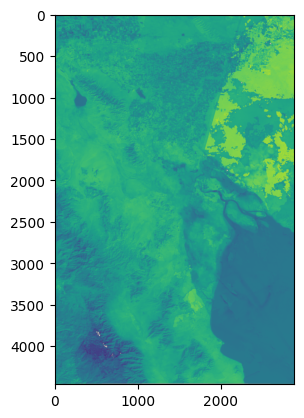

In [24]:
plt.imshow(arr_mean)